<a href="https://colab.research.google.com/github/hardik-05/LLM_TestGen/blob/main/dataset_creation_for_fine_tuning_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
# Install libraries
!pip install -q datasets transformers sentence_transformers faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00


#Load data set from huggingface


In [ ]:
from google.colab import userdata

# Defined in the secrets tab in Google Colab
hf_token = userdata.get('huggingface')

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("NumbersStation/NSText2SQL")
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'output', 'source'],
        num_rows: 289288
    })
})

In [ ]:
dataset['train'].to_pandas()

,instruction,output,source
0,"CREATE TABLE Comments (\n Id number,\n P...","SELECT Id AS ""post_link"", * FROM Posts JOIN Po...",sede
1,"CREATE TABLE table_203_815 (\n id number,\n...","SELECT ""player"" FROM table_203_815 WHERE ""coll...",squall
2,CREATE TABLE t_kc24 (\n ACCOUNT_DASH_DATE t...,SELECT COUNT(*) FROM t_kc21 JOIN t_kc22 JOIN t...,css
3,"CREATE TABLE table_17232 (\n ""Disc"" real,\n...","SELECT MIN(""Track"") FROM table_17232",wikisql
4,"CREATE TABLE course (\n crs_code text,\n ...","SELECT T2.emp_fname, T4.prof_office, T3.crs_de...",spider
...,...,...,...
289283,"CREATE TABLE Comments (\n Id number,\n P...","SELECT Id AS ""post_link"", Tags, ViewCount, Cre...",sede
289284,"CREATE TABLE table_24485 (\n ""Day"" text,\n ...","SELECT ""Time"" FROM table_24485 WHERE ""Stage"" =...",wikisql
289285,CREATE TABLE demographic (\n subject_id tex...,SELECT COUNT(DISTINCT demographic.subject_id) ...,mimicsql_data
289286,CREATE TABLE table_18598175_2 (\n method_of...,SELECT method_of_elimination FROM table_185981...,sql_create_context


#Trim data set to 5000 rows

In [ ]:
from datasets import load_dataset

dataset = load_dataset("NumbersStation/NSText2SQL", split='train')
new_dataset = dataset.shuffle(seed=42).select(range(5000))  # For reproducibility
dataset = new_dataset
dataset.to_pandas()

,instruction,output,source
0,"CREATE TABLE table_61523 (\n ""Place"" real,\...","SELECT MIN(""Place"") FROM table_61523 WHERE ""Go...",wikisql
1,"CREATE TABLE PostHistory (\n Id number,\n ...","SELECT Id AS ""post_link"", Title, Score FROM Po...",sede
2,"CREATE TABLE diagnoses (\n subject_id text,...",SELECT COUNT(DISTINCT demographic.subject_id) ...,mimicsql_data
3,"CREATE TABLE person_info (\n RYBH text,\n ...","(SELECT jyjgzbb.YQBH, jyjgzbb.YQMC FROM hz_inf...",css
4,"CREATE TABLE gyb (\n CLINIC_ID text,\n C...",SELECT COUNT(*) FROM qtb JOIN t_kc22 ON qtb.ME...,css
...,...,...,...
4995,"CREATE TABLE table_test_23 (\n ""id"" int,\n ...",SELECT * FROM table_test_23 WHERE previous_mi = 1,criteria2sql
4996,CREATE TABLE table_name_77 (\n genre VARCHA...,SELECT genre FROM table_name_77 WHERE station ...,sql_create_context
4997,"CREATE TABLE table_31371 (\n ""#"" real,\n ...","SELECT COUNT(""Draws"") FROM table_31371 WHERE ""...",wikisql
4998,"CREATE TABLE Posts (\n Id number,\n Post...","SELECT Id AS ""post_link"", OwnerUserId AS ""user...",sede


# Token analysis of dataset

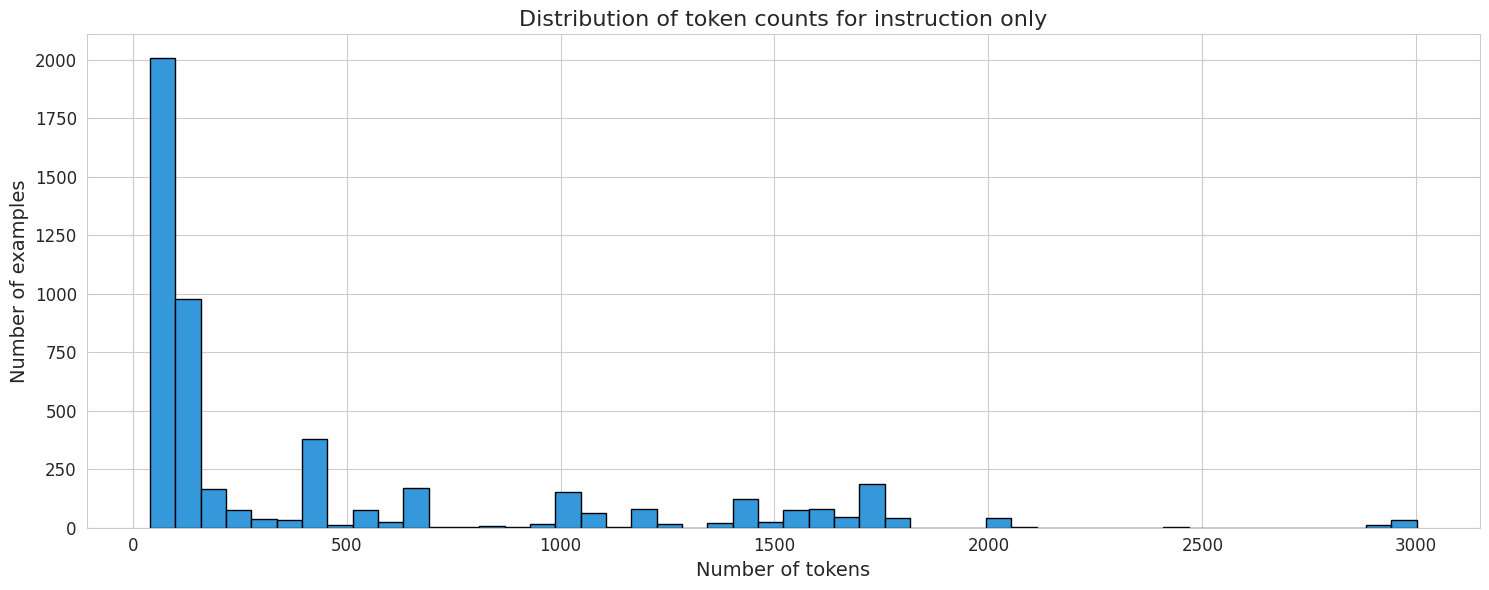

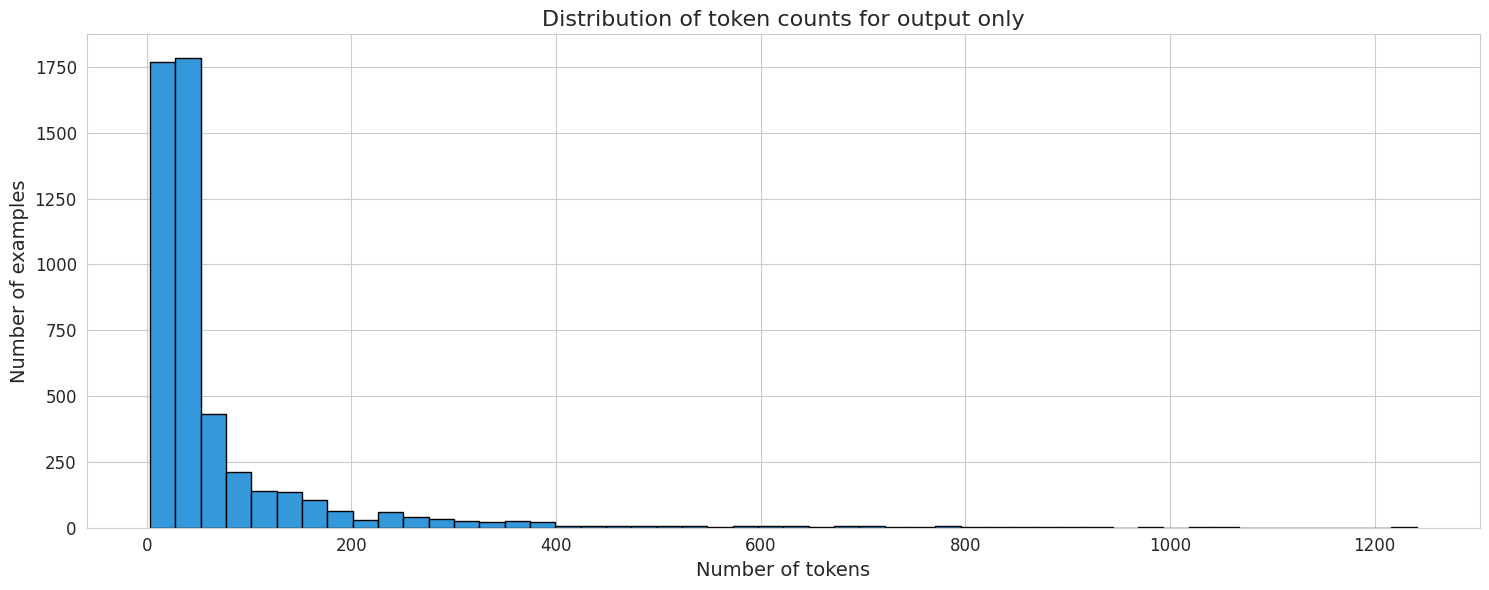

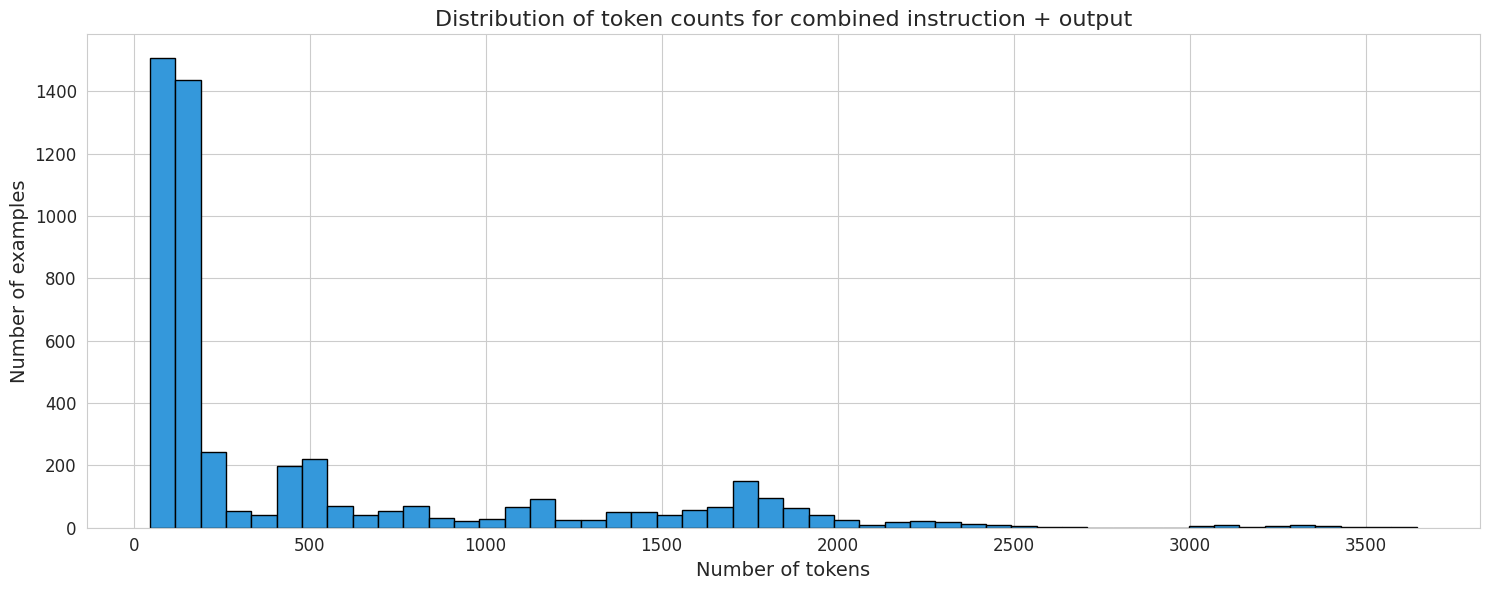

In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

# 2. Tokenize each row and count the number of tokens
#instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in dataset['train']]
#output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset['train']]

instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in dataset]
output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset]

combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Helper function to plot the distributions
def plot_distribution(token_counts, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 6))
    plt.hist(token_counts, bins=50, color='#3498db', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel("Number of tokens", fontsize=14)
    plt.ylabel("Number of examples", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the distribution of token counts
plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

#Filter out rows with more than 2048 tokens
(max context size of Llama 2 by default = 4096)


Number of valid rows: 4854
Removing 146 rows...


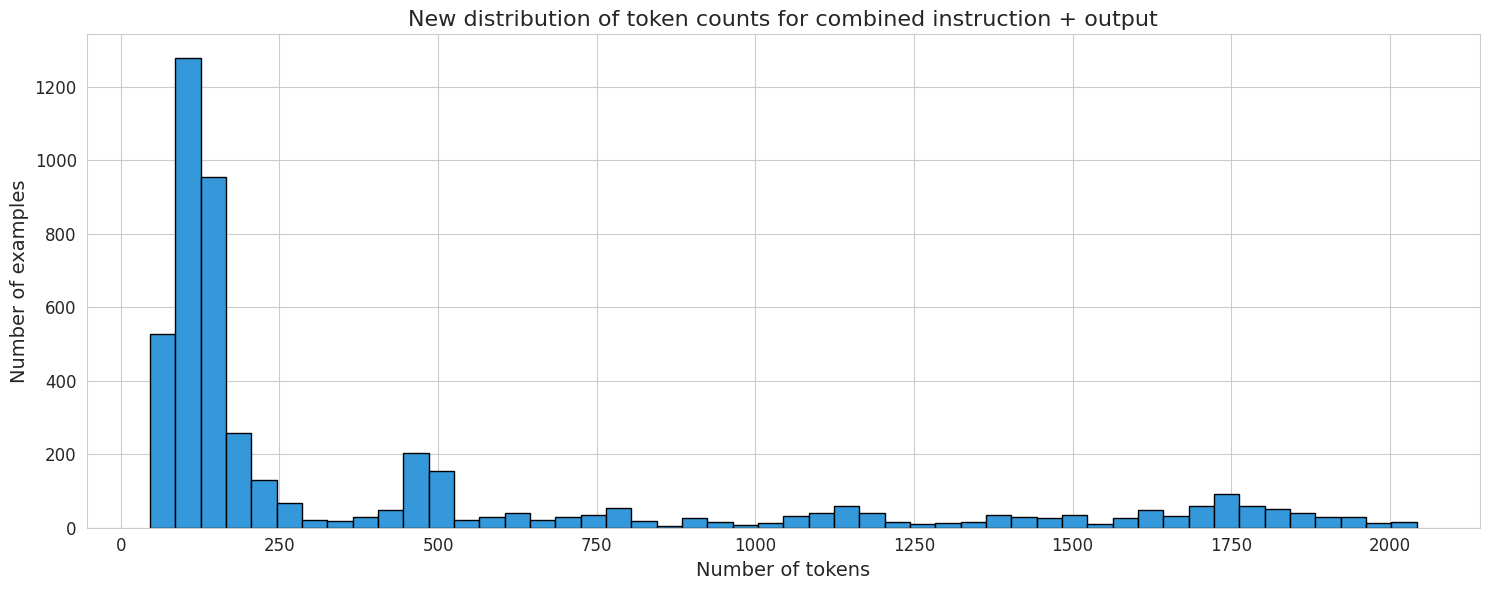

In [ ]:
# Filter out rows with more than 2048 tokens
valid_indices = [i for i, count in enumerate(combined_token_counts) if count <= 2048]
print(f"Number of valid rows: {len(valid_indices)}")
#print(f"Removing {len(dataset['train']) - len(valid_indices)} rows...")

print(f"Removing {len(dataset) - len(valid_indices)} rows...")


# Extract valid rows based on indices
#dataset['train'] = dataset['train'].select(valid_indices)

dataset = dataset.select(valid_indices)

# Get token counts for valid rows
token_counts = [combined_token_counts[i] for i in valid_indices]

plot_distribution(token_counts, "New distribution of token counts for combined instruction + output")

## Near-deduplication using embeddings

[MTEB leaderboard](https://huggingface.co/spaces/mteb/leaderboard)
![](https://i.imgur.com/Fbx1Ivz.png)

# Text to embedding conversion

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.autonotebook import tqdm
import numpy as np

def deduplicate_dataset(dataset: Dataset, model: str, threshold: float):
    sentence_model = SentenceTransformer(model)
    #outputs = [example["output"] for example in dataset['train']]
    outputs = [example["output"] for example in dataset]

    print("Converting text to embeddings...")
    embeddings = sentence_model.encode(outputs, show_progress_bar=True)
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatIP(dimension)
    normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    index.add(normalized_embeddings)

    print("Filtering out near-duplicates...")
    D, I = index.search(normalized_embeddings, k=2)
    to_keep = []

    for i in tqdm(range(len(embeddings)), desc="Filtering"):
        # If the second closest vector (D[i, 1]) has cosine similarity above the threshold
        if D[i, 1] >= threshold:
            # Check if either the current item or its nearest neighbor is already in the to_keep list
            nearest_neighbor = I[i, 1]
            if i not in to_keep and nearest_neighbor not in to_keep:
                # If not, add the current item to the list
                to_keep.append(i)
        else:
            # If the similarity is below the threshold, always keep the current item
            to_keep.append(i)

    #dataset = dataset['train'].select(to_keep)
    dataset = dataset.select(to_keep)
    return DatasetDict({"train": dataset})

deduped_dataset = deduplicate_dataset(dataset, "thenlper/gte-large", 0.95)

Converting text to embeddings...


Batches:   0%|          | 0/152 [00:00<?, ?it/s]

Filtering out near-duplicates...


Filtering:   0%|          | 0/4854 [00:00<?, ?it/s]

In [ ]:
'''print(f"Number of samples in the original dataset: {len(dataset['train'])}")
print(f"Number of samples in the deduped dataset: {len(deduped_dataset['train'])}")
print(f"Number of samples that were removed: {len(dataset['train']) - len(deduped_dataset['train'])}")'''

print(f"Number of samples in the original dataset: {len(dataset)}")
print(f"Number of samples in the deduped dataset: {len(deduped_dataset)}")
print(f"Number of samples that were removed: {len(dataset) - len(deduped_dataset)}")

Number of samples in the original dataset: 4854
Number of samples in the deduped dataset: 1
Number of samples that were removed: 4853


#Top-k sampling
Keep top k sample (in our case k = 1000)

In [ ]:
# Get the top k rows with the most tokens
def get_top_k_rows(dataset, token_counts, k):
    # Sort by descending token count and get top k indices
    sorted_indices = sorted(range(len(token_counts)), key=lambda i: token_counts[i], reverse=True)
    top_k_indices = sorted_indices[:k]

    # Extract top k rows
    top_k_data = {
        #"instruction": [dataset['train'][i]["instruction"] for i in top_k_indices],
        #"output": [dataset['train'][i]["output"] for i in top_k_indices]

        "instruction": [dataset['train'][i]["instruction"] for i in top_k_indices],
        "output": [dataset['train'][i]["output"] for i in top_k_indices]
    }

    return Dataset.from_dict(top_k_data)

# Get token counts
instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in deduped_dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in deduped_dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

k = 1000  # You can adjust this value as needed
top_k_dataset = get_top_k_rows(deduped_dataset, combined_token_counts, k)

# Save these rows in a Dataset object with a 'train' split
dataset = DatasetDict({"train": top_k_dataset})

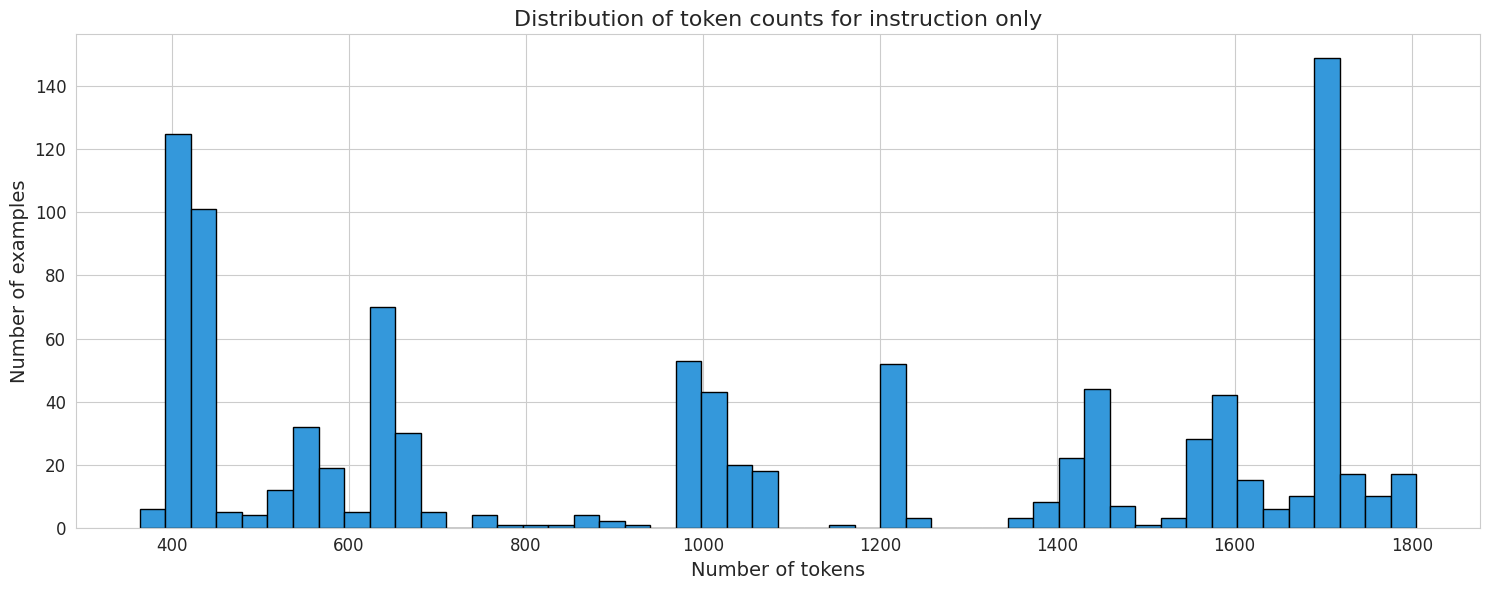

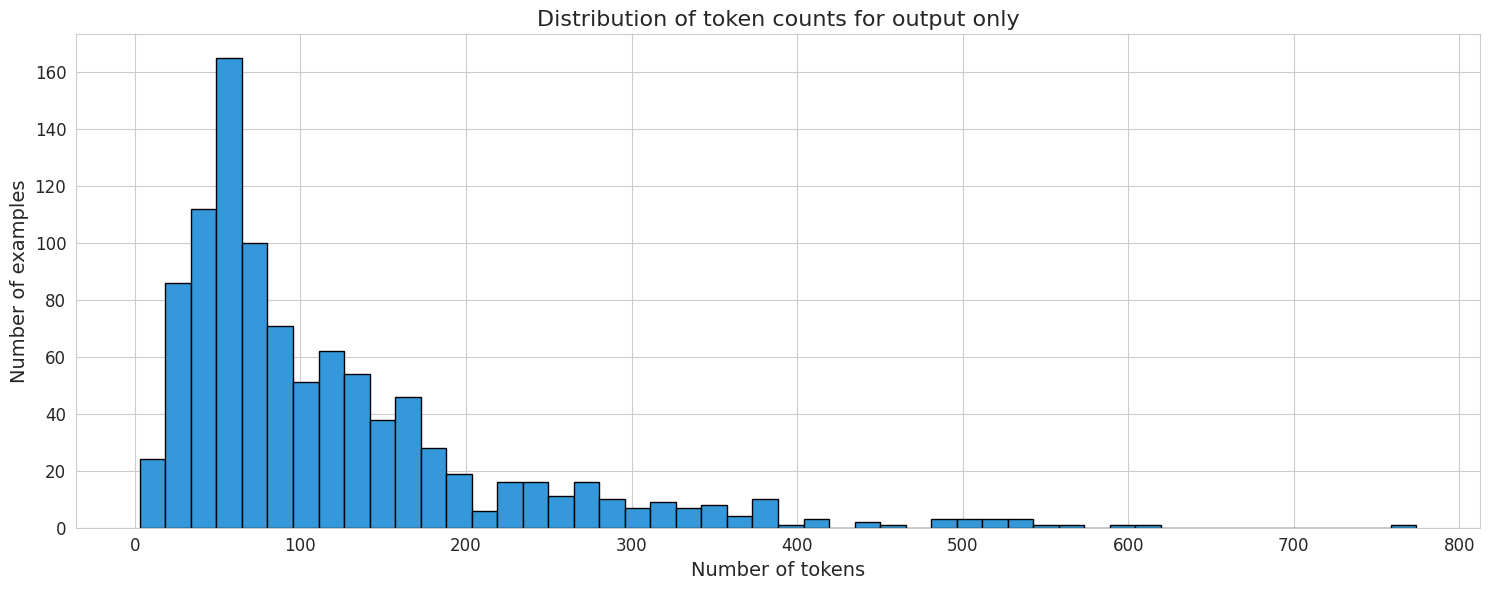

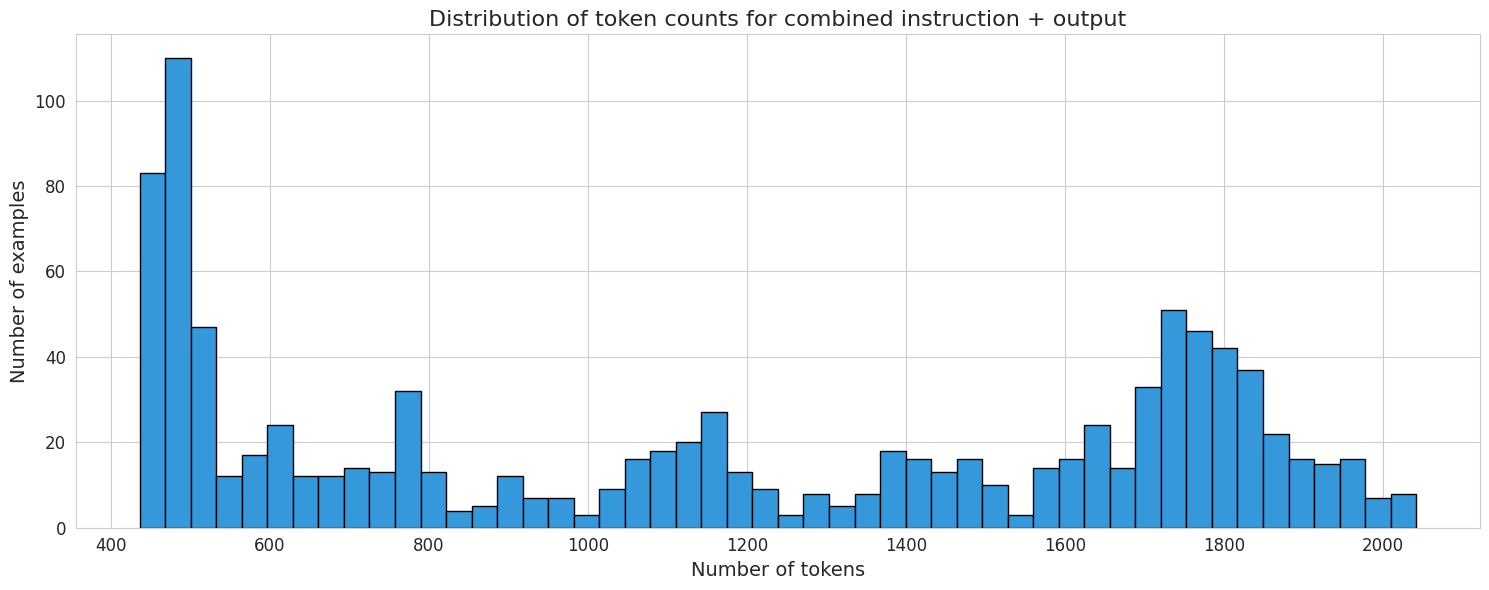

In [ ]:
instruction_token_counts = [len(tokenizer.tokenize(example["instruction"])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Plot the distribution of token counts
plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

In [ ]:
# Read as pandas DataFrame
dataset['train'].to_pandas()

,instruction,output
0,"CREATE TABLE hz_info (\n KH text,\n KLX ...",SELECT wdmzjzjlb.JZLSH FROM person_info JOIN h...
1,"CREATE TABLE jyjgzbb (\n BGDH text,\n BG...",SELECT * FROM hz_info JOIN mzjzjlb JOIN jybgb ...
2,"CREATE TABLE zyjzjlb (\n CYBQDM text,\n ...",SELECT jybgb.BGDH FROM hz_info JOIN mzjzjlb JO...
3,"CREATE TABLE zyjzjlb (\n CYBQDM text,\n ...",SELECT COUNT(*) FROM (SELECT jybgb.KSBM FROM w...
4,"CREATE TABLE jybgb (\n BBCJBW text,\n BB...",SELECT * FROM person_info JOIN hz_info JOIN mz...
...,...,...
995,"CREATE TABLE diagnoses (\n subject_id text,...","SELECT demographic.gender, demographic.languag..."
996,CREATE TABLE demographic (\n subject_id tex...,"SELECT demographic.age, demographic.dob FROM d..."
997,"CREATE TABLE lab (\n subject_id text,\n ...",SELECT MIN(demographic.days_stay) FROM demogra...
998,"CREATE TABLE diagnoses (\n subject_id text,...","SELECT demographic.gender, demographic.languag..."


#Chat templates for different use cases

We need to define a **chat template**, which formats the instructions and responses in a way that is suitable for the model. Here's an example of raw instructions and responses from a [Hugging Face blog post](https://huggingface.co/blog/chat-templates):

```
[
    {"role": "user", "content": "Hi there!"},
    {"role": "assistant", "content": "Nice to meet you!"}
]
```

There are different ways to format it. The most straightforward one would be:

```
User: Hey there!
Assistant: Nice to meet you!
```

In the case of Llama 2, the authors used the following template for the **chat models**:

```
<s>[INST] <<SYS>>
System prompt
<</SYS>>

User prompt [/INST] Model answer </s>
```

Currently, the most popular and standardized chat template is ChatML from OpenAI, which looks like this:

```
<|im_start|>user
Hey there!<|im_end|>
<|im_start|>assistant
Nice to meet you!<|im_end|>
```

The impact of chat templates on the performance of the model is unclear. In most cases, we fine-tune base models that have not been trained with a particular template, which is also why there's no clear standard. However, they are important as they can cause many issues and limit the compatibility of your models.

In [ ]:
def chat_template(example):
    example["instruction"] = f"### Instruction:\n{example['instruction']}\n\n### Response:\n"
    return example

dataset = dataset.map(chat_template)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
dataset['train'].to_pandas()

,instruction,output
0,### Instruction:\nCREATE TABLE hz_info (\n ...,SELECT wdmzjzjlb.JZLSH FROM person_info JOIN h...
1,### Instruction:\nCREATE TABLE jyjgzbb (\n ...,SELECT * FROM hz_info JOIN mzjzjlb JOIN jybgb ...
2,### Instruction:\nCREATE TABLE zyjzjlb (\n ...,SELECT jybgb.BGDH FROM hz_info JOIN mzjzjlb JO...
3,### Instruction:\nCREATE TABLE zyjzjlb (\n ...,SELECT COUNT(*) FROM (SELECT jybgb.KSBM FROM w...
4,### Instruction:\nCREATE TABLE jybgb (\n BB...,SELECT * FROM person_info JOIN hz_info JOIN mz...
...,...,...
995,### Instruction:\nCREATE TABLE diagnoses (\n ...,"SELECT demographic.gender, demographic.languag..."
996,### Instruction:\nCREATE TABLE demographic (\n...,"SELECT demographic.age, demographic.dob FROM d..."
997,### Instruction:\nCREATE TABLE lab (\n subj...,SELECT MIN(demographic.days_stay) FROM demogra...
998,### Instruction:\nCREATE TABLE diagnoses (\n ...,"SELECT demographic.gender, demographic.languag..."


# push custom dataset to huggingface

In [ ]:
dataset.push_to_hub("Text_to_sql_custom_dataset", token=hf_token)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/hardikch05/Text_to_sql_custom_dataset/commit/9a132cb95716aef2470487a541dedbb78ca91a40', commit_message='Upload dataset', commit_description='', oid='9a132cb95716aef2470487a541dedbb78ca91a40', pr_url=None, pr_revision=None, pr_num=None)